In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

import seaborn as sns

In [2]:
palette = sns.color_palette('viridis', n_colors=8)
palette
# print(palette.as_hex())

[(0.281412, 0.155834, 0.469201),
 (0.244972, 0.287675, 0.53726),
 (0.190631, 0.407061, 0.556089),
 (0.147607, 0.511733, 0.557049),
 (0.119699, 0.61849, 0.536347),
 (0.20803, 0.718701, 0.472873),
 (0.430983, 0.808473, 0.346476),
 (0.709898, 0.868751, 0.169257)]

In [3]:
palette2 = sns.color_palette('rocket', n_colors=3)
palette2
# print(palette2.as_hex())

[(0.38092887, 0.12061482, 0.32506528),
 (0.7965014, 0.10506637, 0.31063031),
 (0.95922872, 0.53307513, 0.3748895)]

In [4]:
palette3 = sns.color_palette('deep', n_colors=8)
palette3

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373)]

In [5]:
def modelLV(Y, t, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9):
    X1, X2, X3 = Y
    
    dX1 = a0*X1 - a1*X1 - a2*X1*X2 + a3*X1*X3
    dX2 = a4*X1*X2 - a5*X2 - a6*X2*X3
    dX3 = -a7*X1*X3 + a8*X2*X3 - a9*X3
    
    return [dX1, dX2, dX3]

In [6]:
parNames=['$a_0$', '$a_1$', '$a_2$', '$a_3$', '$a_4$', '$a_5$', '$a_6$', '$a_7$', '$a_8$', '$a_9$', 'RSS']

In [7]:
def simulations(dfParams, Y0, t):
    X1 = []
    X2 = []
    X3 = []
    
    for i in range(dfParams.shape[0]):
        a0 = dfParams['$a_0$'][i]
        a1 = dfParams['$a_1$'][i]
        a2 = dfParams['$a_2$'][i]
        a3 = dfParams['$a_3$'][i]
        a4 = dfParams['$a_4$'][i]
        a5 = dfParams['$a_5$'][i]
        a6 = dfParams['$a_6$'][i]
        a7 = dfParams['$a_7$'][i]
        a8 = dfParams['$a_8$'][i]
        a9 = dfParams['$a_9$'][i]
    
        sol = odeint(modelLV, Y0, t, args=(a0, a1, a2, a3, a4, a5, a6, a7, a8, a9))
        X1.append(sol[:,0])
        X2.append(sol[:,1])
        X3.append(sol[:,2])

    return [X1, X2, X3]

# Lotka-Volterra (Cycle model)

\begin{align}
\dot X_1 &= - a_1 X_1 - a_2 X_1 X_2 + a_3 X_1 X_3 \\
\dot X_2 &= a_4 X_1 X_2 - a_5 X_2 - a_6 X_2 X_3 \\
\dot X_3 &= -a_7 X_1 X_3 + a_8 X_2 X_3 - a_9 X_3 \\
\end{align}

In [8]:
a0 = 0.0 # Reproduction rate of X1
a1 = 0.18 # Mortality rate of X1
a2 = 0.16 # Rate of predation of X2 on X1
a3 = 0.15 # Reproduction rate of X1 in presence of X3
a4 = 0.11 # Reproduction rate of X2 in presence of X1
a5 = 0.02 # Mortality rate of X2
a6 = 0.12 # Rate of predation of X3 on X2
a7 = 0.04 # Rate of predation of X1 on X3
a8 = 0.12 # Reproduction rate of X3 in presence of X2
a9 = 0.02 # Mortality rate of X3

In [9]:
dfGroundPars = pd.DataFrame([a0, a1, a2, a3, a4, a5, a6, a7, a8, a9]).T
dfGroundPars.columns = parNames[:-1]

In [10]:
dfGroundPars

,$a_0$,$a_1$,$a_2$,$a_3$,$a_4$,$a_5$,$a_6$,$a_7$,$a_8$,$a_9$
0,0.0,0.18,0.16,0.15,0.11,0.02,0.12,0.04,0.12,0.02


In [11]:
a0 = dfGroundPars['$a_0$'][0]
a1 = dfGroundPars['$a_1$'][0]
a2 = dfGroundPars['$a_2$'][0]
a3 = dfGroundPars['$a_3$'][0]
a4 = dfGroundPars['$a_4$'][0]
a5 = dfGroundPars['$a_5$'][0]
a6 = dfGroundPars['$a_6$'][0]
a7 = dfGroundPars['$a_7$'][0]
a8 = dfGroundPars['$a_8$'][0]
a9 = dfGroundPars['$a_9$'][0]

In [12]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)
dt = t[1]-t[0]

sol = odeint(modelLV, Y0, t, args=(a0, a1, a2, a3, a4, a5, a6, a7, a8, a9))

X1_g = sol[:,0]
X2_g = sol[:,1]
X3_g = sol[:,2]

In [13]:
# dfData_noise.to_csv('cycle/LVdata_noise.data', sep=' ', index=False, float_format='%.2f')
dfData = pd.read_csv('cycle/LVdata_noise.data', sep=' ')

In [14]:
# dfData_1 = pd.DataFrame(np.transpose([t[5:80:15],X3_g[5:80:15]]), columns=['Time','X3'])
# dfData_2 = pd.DataFrame(np.transpose([t[15:100:20],X3_g[15:100:20]]), columns=['Time','X3'])
# dfData_3 = pd.DataFrame(np.transpose([t[0:100:10],X3_g[0:100:10]]), columns=['Time','X3'])
# dfData_4 = pd.DataFrame(np.transpose([t[20::40],X3_g[20::40]]), columns=['Time','X3'])

dfNoise_1 = pd.read_csv('cycle/LVdata_X3noise_1.csv')
dfNoise_2 = pd.read_csv('cycle/LVdata_X3noise_2.csv')
dfNoise_3 = pd.read_csv('cycle/LVdata_X3noise_3.csv')
dfNoise_4 = pd.read_csv('cycle/LVdata_X3noise_4.csv')

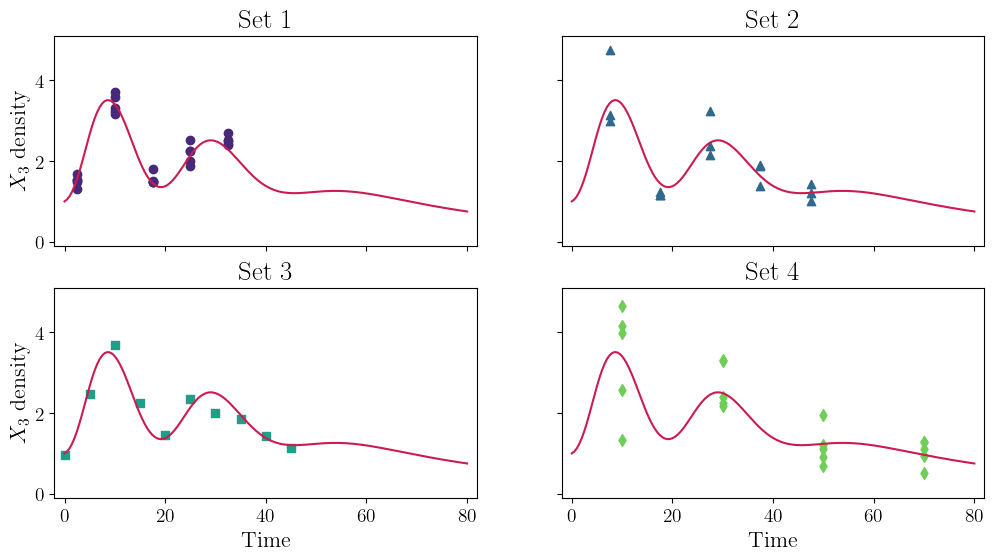

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,6), sharex=True, sharey=True)

axs[0,0].scatter(x=dfNoise_1['Time'], y=dfNoise_1['X3'], color=palette[0], marker="o")
axs[0,1].scatter(x=dfNoise_2['Time'], y=dfNoise_2['X3'], color=palette[2], marker="^")
axs[1,0].scatter(x=dfNoise_3['Time'], y=dfNoise_3['X3'], color=palette[4], marker="s")
axs[1,1].scatter(x=dfNoise_4['Time'], y=dfNoise_4['X3'], color=palette[6], marker="d")

axs[0,0].plot(t, X3_g, lw=1.5, color=palette2[1])
axs[0,1].plot(t, X3_g, lw=1.5, color=palette2[1])
axs[1,0].plot(t, X3_g, lw=1.5, color=palette2[1])
axs[1,1].plot(t, X3_g, lw=1.5, color=palette2[1])

axs[0,0].set_ylabel('$X_3$ density')
axs[1,0].set_ylabel('$X_3$ density')

axs[1,0].set_xlabel('Time')
axs[1,1].set_xlabel('Time')

for i in range(2):
    for j in range(2):
        axs[i,j].set_title(f'Set {2*i + j + 1}')
        axs[i,j].set_ylim((-0.1,5.1))

plt.setp(axs, xlim=(-2,82))

# plt.savefig("synDatasets_X3.pdf")

plt.show()

## Recovering parameters

In [16]:
dfParams_ground = dfGroundPars.drop(columns=['$a_0$']).melt(var_name='Parameters', value_name='Values')

In [17]:
dfData = pd.read_csv('cycle/LVdata_noise.data', sep=' ')

In [18]:
# dfParams = pd.read_csv('tmp/test/bestPars.dat', sep=' ', names=parNames)
dfParams = pd.read_csv('cycle/bestPars_qt_X3.dat', sep=' ', names=parNames)
dfParams.tail()

,$a_0$,$a_1$,$a_2$,$a_3$,$a_4$,$a_5$,$a_6$,$a_7$,$a_8$,$a_9$,RSS
995,0.0,0.050000,0.5000,0.37889,0.5,0.010025,0.39724,0.100000,0.12352,0.010000,110.38
996,0.0,0.050000,0.5000,0.25960,0.5,0.010000,0.47812,0.079322,0.16814,0.010158,112.99
997,0.0,0.053825,0.5000,0.40785,0.5,0.013829,0.38853,0.100000,0.11426,0.010799,104.22
998,0.0,0.050000,0.5000,0.35945,0.5,0.010000,0.40134,0.100000,0.13141,0.010000,111.48
999,0.0,0.056754,0.4894,0.40221,0.5,0.010000,0.38514,0.100000,0.11209,0.010000,110.78


In [19]:
X1_0 = 4
X2_0 = 2
X3_0 = 1
Y0 = [X1_0, X2_0, X3_0]

t = np.linspace(0, 80, 161)

X1_I, X2_I, X3_I = simulations(dfParams, Y0, t)

/tmp/ipykernel_4885/201619411.py:18: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(modelLV, Y0, t, args=(a0, a1, a2, a3, a4, a5, a6, a7, a8, a9))


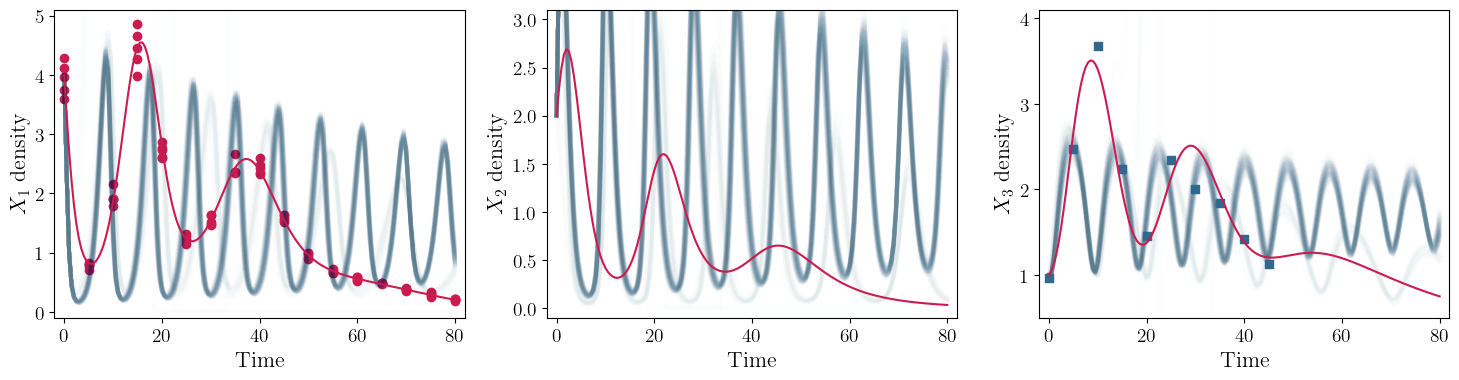

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,4), sharex=True)

# for i in range(dfParams.shape[0]):
for i in range(100):
    axs[0].plot(t, X1_I[i], lw=3, color=palette[2], alpha=0.01)
    axs[1].plot(t, X2_I[i], lw=3, color=palette[2], alpha=0.01)
    axs[2].plot(t, X3_I[i], lw=3, color=palette[2], alpha=0.01)
# i=2
# axs[0].plot(t, X1_I[i], lw=3, color=palette[i])
# axs[1].plot(t, X2_I[i], lw=3, color=palette[i])
# axs[2].plot(t, X3_I[i], lw=3, color=palette[i])

axs[0].scatter(x=dfData['Time'], y=dfData['X1'], color=palette2[1], marker="o")

# axs[2].scatter(dfNoise_1['Time'], dfNoise_1['X3'],
                # color=palette[0], label='Set 1', marker='o')
# axs[2].scatter(dfNoise_2['Time'], dfNoise_2['X3'],
                # color=palette[1], label='Set 2', marker='^')
axs[2].scatter(dfNoise_3['Time'], dfNoise_3['X3'],
                color=palette[2], label='Set 3', marker='s')
# axs[2].scatter(dfNoise_4['Time'], dfNoise_4['X3'],
                # color=palette[3], label='Set 4', marker='d')

axs[0].plot(t, X1_g, lw=1.5, color=palette2[1])
axs[1].plot(t, X2_g, lw=1.5, color=palette2[1])
axs[2].plot(t, X3_g, lw=1.5, color=palette2[1])

axs[0].set_ylabel('$X_1$ density')
axs[1].set_ylabel('$X_2$ density')
axs[2].set_ylabel('$X_3$ density')

axs[0].set_xlabel('Time')
axs[1].set_xlabel('Time')
axs[2].set_xlabel('Time')

axs[0].set_ylim((-0.1,5.1))
axs[1].set_ylim((-0.1,3.1))
axs[2].set_ylim((0.5,4.1))

plt.setp(axs, xlim=(-2,82))

# plt.savefig("cycleLV_graphs.svg", transparent=True)

plt.show()